In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [3]:
X_test.shape

(10000, 28, 28)

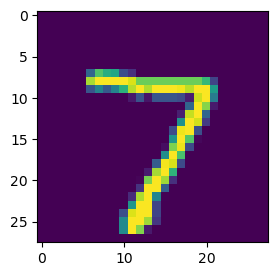

In [4]:
plt.figure(figsize=(3,3))
plt.imshow(X_test[0])

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
#converting the target int One Hot Encoding 
from tensorflow.keras.utils import to_categorical

In [7]:
y_train_cat=to_categorical(y_train,num_classes=10)

In [8]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [9]:
y_test_cat=to_categorical(y_test,10)

In [10]:
print(X_train[0].max())
print(X_train[0].min())

255
0


In [11]:
#Normalizing the training data
X_train=X_train/255
X_test=X_test/255

In [12]:
print(X_train[0].max())

1.0


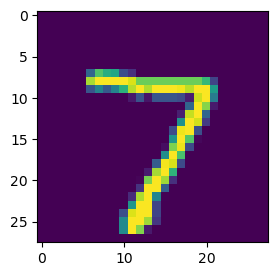

In [13]:
plt.figure(figsize=(3,3))
plt.imshow(X_test[0])

In [14]:
X_train=X_train.reshape(60000,28,28,1)

In [15]:
X_test=X_test.reshape(10000,28,28,1)

In [16]:
#Training the Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [17]:
model=Sequential()

#Convolutional Layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
#Poolin Layer
model.add(MaxPool2D(pool_size=(2,2)))
#Flatten imagers from 28x28 to 764 before final layer
model.add(Flatten())
#Dense Hidden layer
model.add(Dense(units=128,activation='relu'))
#Last Layer
model.add(Dense(units=10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [19]:
from tensorflow.keras.callbacks import EarlyStopping
earlystopping=EarlyStopping(monitor='val_loss',patience=2)

In [20]:
model.fit(X_train,y_train_cat,epochs=10,validation_data=(X_test,y_test_cat),callbacks=[earlystopping])

Epoch 1/10


1875/1875 [==============================] - 18s 9ms/step - loss: 0.1378 - accuracy: 0.9581 - val_loss: 0.0521 - val_accuracy: 0.9839
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0469 - accuracy: 0.9854 - val_loss: 0.0457 - val_accuracy: 0.9848
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0301 - accuracy: 0.9905 - val_loss: 0.0438 - val_accuracy: 0.9850
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0196 - accuracy: 0.9936 - val_loss: 0.0575 - val_accuracy: 0.9824
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0150 - accuracy: 0.9952 - val_loss: 0.0423 - val_accuracy: 0.9873
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0099 - accuracy: 0.9965 - val_loss: 0.0495 - val_accuracy: 0.9859
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0076 - accuracy: 0.9974 - val_loss: 0.0454 - val_

In [21]:
loss=pd.DataFrame(model.history.history)

<AxesSubplot:>

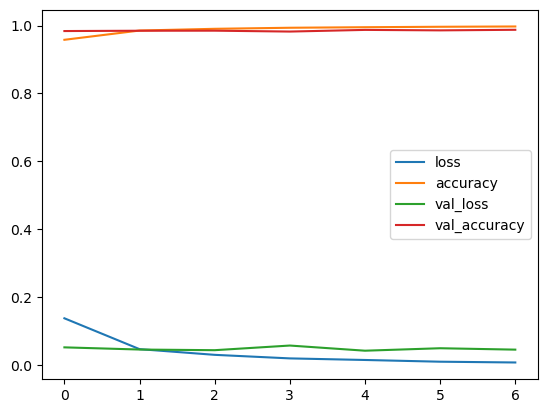

In [22]:
loss.plot()

<AxesSubplot:>

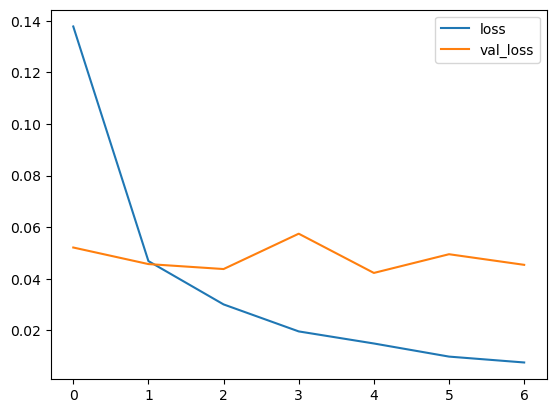

In [23]:
loss[['loss','val_loss']].plot()

<AxesSubplot:>

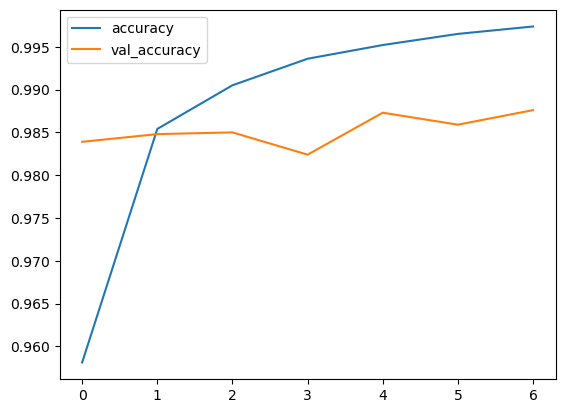

In [24]:
loss[['accuracy','val_accuracy']].plot()

In [25]:
print(model.metrics_names)
print(model.evaluate(X_test,y_test_cat,verbose=0))

['loss', 'accuracy']
[0.045418430119752884, 0.9876000285148621]


In [26]:
prediction= np.argmax(model.predict(X_test), axis=-1)

313/313 [==============================] - 2s 4ms/step


In [27]:
print(prediction[0])
print(y_test_cat[0])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [28]:
from sklearn.metrics import confusion_matrix,classification_report

In [29]:
print('Classification Report : \n')
print(classification_report(y_test,prediction))

Classification Report : 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<AxesSubplot:>

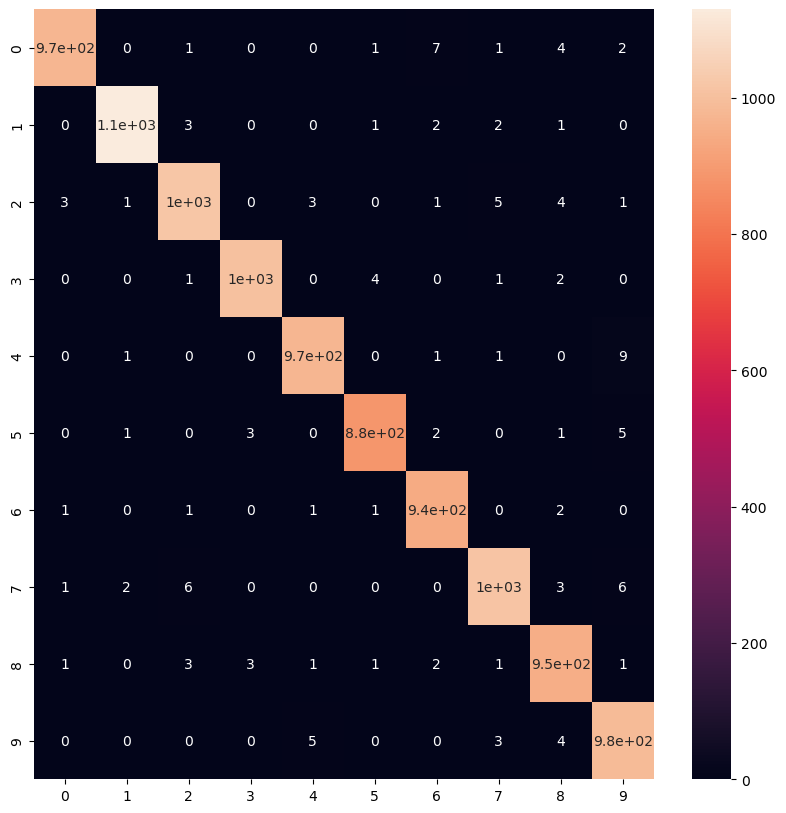

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(prediction,y_test),annot=True)

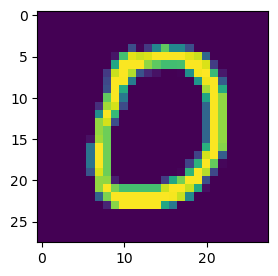

In [31]:
plt.figure(figsize=(3,3))
test=X_test[10]
plt.imshow(test)

In [34]:
test=test.reshape(1,28,28,1)
pred=np.argmax(model.predict(test), axis=-1)

1/1 [==============================] - 0s 49ms/step


In [35]:
pred[0]

0